朴素贝叶斯
理论部分

相关概念
首先假设x为特征，y为类别结果。
生成模型是知道结果的情况下，对样本特征建立概率模型，是在给定样本所属类的情况下。形式化表示为$p(y|x)$。当然这里最大的记忆难点就是x和y在形式化表示中的位置，因此建议下一种方式进行记忆。要生成一个模型，那就是谁根据什么生成了模型，谁就是类别y，根据的内容就是x，所以是$p(x|y)$。
判别模型是根据特征值来求结果的概率。形式化表示为$p(y|x;\theta)$，在参数确定的情况下，求解条件概率，通俗的解释为在给定特征后预测结果出现的概率。即要判断这个东西到底是哪一类，也就是要求y，那给定的就是x，所以是p(y|x)。
朴素贝叶斯基本原理
贝叶斯定理
首先，要明白贝叶斯统计方式与统计学中的频率概念是不同，从频率的角度出发，即假定数据遵循某种分布，我们的目标是确定该分布的几个参数，在某个固定的环境一下做模型。而贝叶斯则是根据实际的推理方式来建模。我们拿到的数据，来更新模型对某事件即将发生的可能性的预测结果。在贝叶斯统计学中，我们使用数据来描述模型，而不是使用模型来描述数据。
贝叶斯定理旨在计算P(A|B)的值，也就是在已知B发生的条件下，A发生的概率是多少。大多数情况下，B是被观察事件，比如“昨天下雨了”，A为预测结果“今天会下雨”。对数据挖掘来说，B通常是观察样本个体，A为被预测个体所属类别。所以，说简单一点，贝叶斯就是计算的是：B是A类别的概率。
贝叶斯公式：
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
条件概率公式:
$$P(A|B)=\frac{P(AB)}{P(B)}$$
乘法公式
$$P(AB)=P(B)P(A|B)=P(A)P(B|A)=P(BA)$$
全概率公式
$$P(B)=\sum^n_{i=1}P(A_i)P(B|A_i)$$
贝叶斯定理
$$P(A_i|B)=\frac{P(A_i)P(B|A_i)}{\sum^n_{i=1}P(A_i)P(B|A_i)}$$
特征条件独立假设:
假设了数据集属性之间是相互独立的，因此算法的逻辑性十分简单，并且算法较为稳定，当数据呈现不同的特点时，朴素贝叶斯的分类性能不会有太大的差异。
后验概率最大化:朴素贝叶斯法将实例分到后验概率最大的类中，这等价于期望风险最小化，假设选择0-1损失函数：
$$
L(Y,f(X))=
\begin{cases}
0, & \text{Y = f(X)}  \\
1, & \text{Y $\neq$ f(X)}
\end{cases}
$$
式中$f(X)$是分类决策函数，这时，期望风险函数为
$$R_{exp}(f)=E[L(Y,f(X))]$$
期望是对联合分布$P(X,Y)$取的，由此条件期望
$$R_{exp}=E_X\sum^K_{k=1}[L(c_k,f(X))]P(c_k|X)$$
为了使期望风险最小化，只需对X=x逐个极小化，由此得到：
$$
f(x)=arg\min_{y\in Y}L(c_k,y)P(c_k|X=x)=arg\max_{y\in Y}P(c_k|X=x)
$$
这样一来，根据期望风险最小化准则就得到了后验概率最大化准则：
$$f(x)=arg\max_{x_k}P(x_k|X=x)$$
拉普拉斯平滑
根据假设，先验概率P(θ)是[0,1]上的均匀分布，所以可以将其从积分中提出来并消去，得到：
$$P(\theta|D)=\frac{P(D|\theta)}{\int_0^1 P(D|t)t}$$
再利用公式（Beta函数的性质）：
$$\int_0^1P(D|\theta)d\theta=\int_0^1\theta^{n_1}(1-\theta)^{n-n_1}d\theta=\frac{n_1!(n-n_1)!}{(n+1)!}$$
可以得到后验概率P(θ|D)的表达式：
$$P(\theta|D)=\frac{(n+1)!}{n_1!(n-n_1)!}\theta^{n_1}(1-\theta)^{n-n_1}$$
可见其刚好是Beta分布$B(n_1+1,n-n_1+1)$,其期望值为：$$\frac{n_1+1}{n+2}$$
朴素贝叶斯的三种形式
高斯型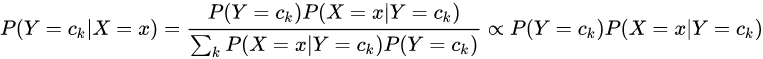
多项式型
伯努利型伯努利模型适用于离散特征的情况，所不同的是，伯努利模型中每个特征的取值只能是1和0(以文本分类为例，某个单词在文档中出现过，则其特征值为1，否则为0).

伯努利模型中，条件概率P(xi|yk)P(xi|yk)的计算方式是：

当特征值$x_i$为1时，$$P(x_i|y_k)=P(x_i=1|y_k)P(x_i|y_k)=P(x_i=1|y_k)$$；

当特征值$x_i$为0时，$$P(x_i|y_k)=1−P(x_i=1|y_k)P(x_i|y_k)=1−P(x_i=1|y_k)$$；

极值问题情况下的每个类的分类概率
下溢问题如何解决
零概率问题如何解决


sklearn参数详解
高斯朴素贝叶斯
Gaussian Naive Bayes (GaussianNB)（1.9.1）

参数：

priors : array-like, shape (n_classes,)，先验概率，如果设置了先验概率则不会根据数据调整。

属性：
1、class_prior_ : array, shape (n_classes,)，每个类别的概率。
2、class_count_ : array, shape (n_classes,)，每个类别观察训练样本的数量。
3、theta_ : array, shape (n_classes, n_features)，每个类别每个特征的平均值。
4、sigma_ : array, shape (n_classes, n_features)，每个类别每个特征的方差。

方法：
1、fit(X, y[, sample_weight])，拟合。
2、get_params([deep])，得到参数。
3、partial_fit(X, y[, classes, sample_weight])，部分样本上的增量拟合。
4、predict(X)，预测。
5、predict_log_proba(X)，返回测试向量X的对数概率估计。
6、predict_proba(X)，返回测试向量X的概率估计。
7、score(X, y[, sample_weight])，返回给定测试数据和label的平均精度。
8、set_params(**params)，设定参数。

多项式朴素贝叶斯
Naive Bayes classifier for multinomial models（MultinomialNB，1.9.2）

参数：
1、alpha : float, optional (default=1.0)，加性（Laplace/Lidstone）平滑参数（0不平滑）。
2、fit_prior : boolean, optional (default=True)，是否要学习类别的先验概率。如果是False，将使用统一的先验概率。
3、class_prior : array-like, size (n_classes,), optional (default=None)，类的先验概率。如果指定了先验信息，则不会根据数据进行调整。

属性：
1、class_log_prior_ : array, shape (n_classes, )，每个类的平滑的经验对数概率。
2、intercept_ : property，将多项式朴素贝叶斯理解为线性模型时，class_log_prior_的镜像。
3、feature_log_prob_ : array, shape (n_classes, n_features)，给定类别的特征值的经验对数概率，P(x_i|y)。
4、coef_ : property，将多项式朴素贝叶斯理解为线性模型时，feature_log_prob_的镜像。
5、class_count_ : array, shape (n_classes,)，在拟合的过程中每个类所遇到的样本数。给定这个值的时候由样本权重加权。
6、feature_count_ : array, shape (n_classes, n_features)，在拟合的过程中每个(class, feature)所遇到的样本数。给定这个值的时候由样本权重加权。

方法：
1、fit(X, y[, sample_weight])，拟合
2、get_params([deep])，得到参数
3、partial_fit(X, y[, classes, sample_weight])，部分样本上的增量拟合。
4、predict(X)，预测
5、predict_log_proba(X)，返回测试向量X的对数概率估计。
6、predict_proba(X)，返回测试向量X的概率估计。
7、score(X, y[, sample_weight])，返回给定测试数据和label的平均精度。
8、set_params(**params)，设置参数。

伯努利朴素贝叶斯

参数：
1、alpha : float, optional (default=1.0)，加性（Laplace/Lidstone）平滑参数（0不平滑）。
2、binarize : float or None, optional (default=0.0)，二值化的样本特征阈值（映射到布尔型）。如果为None，输入被认为已经包含了二进制向量。
3、fit_prior : boolean, optional (default=True)，是否要学习类别的先验概率。如果是False，将使用统一的先验概率。
4、class_prior : array-like, size (n_classes,), optional (default=None)，类的先验概率。如果指定了先验信息，则不会根据数据进行调整。

属性：
1、class_log_prior_ : array, shape (n_classes, )，每个类的平滑的经验对数概率。
2、feature_log_prob_ : array, shape (n_classes, n_features)，给定类别的特征值的经验对数概率，P(x_i|y)。
3、class_count_ : array, shape (n_classes,)，在拟合的过程中每个类所遇到的样本数。给定这个值的时候由样本权重加权。
4、feature_count_ : array, shape (n_classes, n_features)，在拟合的过程中每个(class, feature)所遇到的样本数。给定这个值的时候由样本权重加权。

方法：
和上面一样。

高斯朴素贝叶斯只有一个参数还是设置先验概率，不方便设置，因此，我没有修改，正确率86.07%，也很不错了。

多项式朴素贝叶斯，修改alpha的值，正确率有轻微的上升下降，变化不大。修改fit_prior,正确率，没有变化。

伯努利朴素贝叶斯，修改alpha，有细微的变化。修改二值化binarize，有轻微变化，修改fit_prior，没有变化。


利用sklearn解决聚类问题。
sklearn.naive_bayes.GaussianNB

In [1]:
import numpy as np

In [2]:
features_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
labels_train = np.array([1, 1, 1, 2, 2, 2])


In [3]:

from sklearn.naive_bayes import GaussianNB


In [4]:
clf = GaussianNB()

In [5]:
clf.fit(features_train, labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
features_test = np.array([[-0.8,-1]])
labels_test = np.array([1])
#pred = clf.predict(features_test)
#print(pred)

In [10]:
pred = clf.predict(features_test)

In [11]:
print(pred)

[1]
